Using a KMeans to produce a representation of the "digits" (= 8 x 8 MNIST) - Dataset, which is then classified by a logistic regression model.

Findings:
1. There is improvement over plain logistic regression: 0.983 vs. 0.975
2. For some reason the grid-search over the best number of clusters to use is quite random - i.e. sometimes 46 clusters are "the best" <br> 
(with a score below the nof_clusters=100 solution), sometimes the "best_params_" returns a much higher number of clusters with the same score <br>
 as the k=100 solution, despite k=100 being in the search space.

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, tol=0.04)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9722222222222222

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

nof_clusters = 100
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=nof_clusters)),
    #("log_reg", LogisticRegression()),
    ("log_reg", LogisticRegression(tol=0.4, max_iter=10000))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9777777777777777

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
#    ("scaler", StandardScaler()),
    ("kmeans", KMeans()),
    ("log_reg", LogisticRegression(tol=0.4, max_iter=10000)),
])

param_grid = {
    "kmeans__n_clusters" : range(2,201)
    }
grid_clf= GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 199 candidates, totalling 597 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.4))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(2, 201)},
             verbose=2)

In [37]:
grid_clf.best_params_, grid_clf.score(X_test, y_test)

({'kmeans__n_clusters': 83}, 0.9722222222222222)

In [81]:
yt0 = y_test == 0
X0_test = X_test[yt0]
yt1 = y_test == 1
X1_test = X_test[yt1]
yt7 = y_test == 7
X7_test = X_test[yt7]

In [82]:
X0_test.shape, X1_test.shape, X_test.shape, X7_test.shape

((44, 64), (37, 64), (360, 64), (35, 64))

In [83]:
p0 = grid_clf.predict_proba(X0_test)
p1 = grid_clf.predict_proba(X1_test)
p7 = grid_clf.predict_proba(X7_test)

In [84]:
p0is0 = np.array([ b[0] for b in p0])
p1is1 = np.array([ b[1] for b in p1])
p7is7 = np.array([ b[7] for b in p7])

In [85]:
p0s = np.sort(p0is0)
p1s = np.sort(p1is1)
p7s = np.sort(p7is7)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 43.]),
 array([0.1026669 , 0.19240021, 0.28213352, 0.37186683, 0.46160014,
        0.55133345, 0.64106676, 0.73080007, 0.82053338, 0.91026669,
        1.        ]),
 <BarContainer object of 10 artists>)

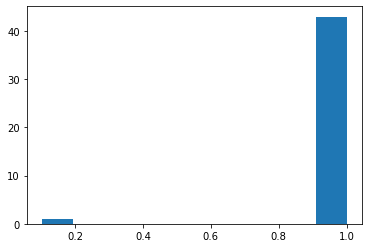

In [86]:
_0counts, _0bins = np.histogram(p0s)
plt.hist(_0bins[:-1], _0bins, weights=_0counts)


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.]),
 array([0.44855978, 0.50370378, 0.55884778, 0.61399178, 0.66913578,
        0.72427977, 0.77942377, 0.83456777, 0.88971177, 0.94485577,
        0.99999976]),
 <BarContainer object of 10 artists>)

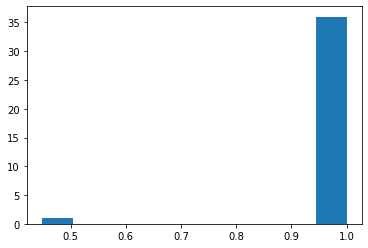

In [87]:
_1counts, _1bins = np.histogram(p1s)
plt.hist(_1bins[:-1], _1bins, weights=_1counts)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 33.]),
 array([0.2716564 , 0.34449076, 0.41732512, 0.49015948, 0.56299384,
        0.6358282 , 0.70866256, 0.78149692, 0.85433128, 0.92716564,
        1.        ]),
 <BarContainer object of 10 artists>)

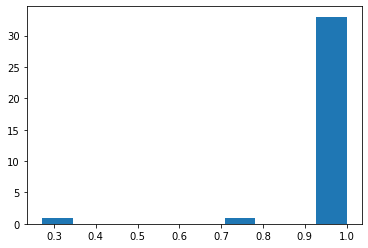

In [88]:
_7counts, _7bins = np.histogram(p7s)
plt.hist(_7bins[:-1], _7bins, weights=_7counts)